# Sieve measurements of NREL 2FBR particles

Particle samples of loblolly pine, fresh sand, used sand, fresh catalyst, and used catalyst were provided by Rick French from an experiment of the NREL 2FBR system. Sieve measurements of the particles were conducted at UTK. Pictures of the experimental setup are available in the `images` folder. Documentation of the 2FBR system is available at [chemics.github.io/docs-2fbr/](https://chemics.github.io/docs-2fbr/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Pine and char sieve measurements

For the `char2` measurements, sieve sizes 500-355 um used container A and sieve sizes 300-0 um used container C. A sieve size of 0 represents the bottom pan of the shaker.

,sieve[um],char2_contA[g],char2[g],cm. char [g],wt. below [g],cm. passing [%]
0,500,222.20,0.80,0.80,64.90,98.782344
1,425,223.78,2.38,3.18,62.52,95.159817
2,355,231.00,9.60,12.78,52.92,80.547945
3,300,404.70,29.90,42.68,23.02,35.038052
4,212,376.52,1.72,44.40,21.30,32.420091
5,125,388.45,13.65,58.05,7.65,11.643836
6,0,382.45,7.65,65.70,0.00,0.000000


char2 total = 65.7 g


,sieve[um],pine_contA[g],pine[g],cm. pine [g],wt. below [g],cm. passing [%]
0,500,227.30,5.90,5.90,24.81,80.788017
1,425,226.48,5.08,10.98,19.73,64.246174
2,355,231.90,10.50,21.48,9.23,30.055357
3,300,223.38,1.98,23.46,7.25,23.607945
4,212,223.10,1.70,25.16,5.55,18.072289
5,125,225.95,4.55,29.71,1.00,3.256268
6,0,222.40,1.00,30.71,0.00,0.000000


pineA total = 30.71 g


,sieve[um],pine_contC[g],pine[g],cm. pine [g],wt. below [g],cm. passing [%]
0,500,398.60,23.80,23.80,93.79,79.760184
1,425,393.96,19.16,42.96,74.63,63.466281
2,355,414.90,40.10,83.06,34.53,29.364742
3,300,398.20,23.40,106.46,11.13,9.465091
4,212,377.75,2.95,109.41,8.18,6.956374
5,125,381.30,6.50,115.91,1.68,1.428693
6,0,376.48,1.68,117.59,0.00,0.000000


pineC total = 117.59 g


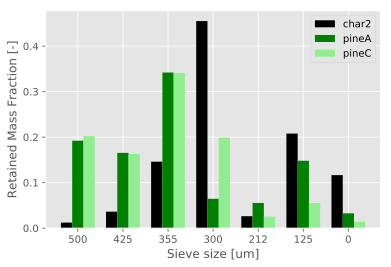

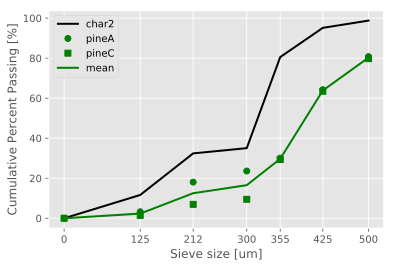

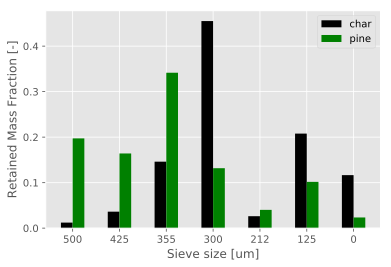

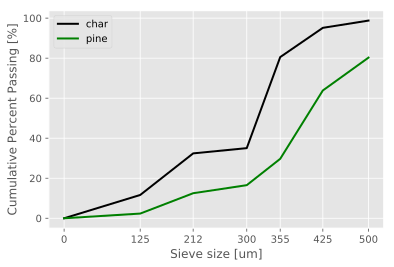

In [2]:
# Read measurements from CSV files
df_char2 = pd.read_csv('../data/sieve_char2.csv')  # char2 data
df_pineA = pd.read_csv('../data/sieve_pineA.csv')  # pineA data
df_pineC = pd.read_csv('../data/sieve_pineC.csv')  # pineC data

# Char analysis
char2_sieve = df_char2['sieve[um]'].values  # sieve pan hole size, microns
char2_retain = df_char2['char2[g]'].values  # retained mass on each sieve, grams

char2_tot = sum(char2_retain)               # total mass of char, grams
char2_cm = np.cumsum(char2_retain)          # cumulative sum of char, grams
char2_wtbelow = char2_tot - char2_cm        # weight below sieve, grams
char2_pass = (char2_wtbelow/char2_tot)*100  # cumulative percent passing, %

df_char2['cm. char [g]'] = char2_cm        # add cumulative sum to dataframe
df_char2['wt. below [g]'] = char2_wtbelow  # add weight below to dataframe
df_char2['cm. passing [%]'] = char2_pass   # add cumulative passing to dataframe

display(df_char2)
print(f'char2 total = {char2_tot:g} g')

# PineA analysis
pineA_sieve = df_pineA['sieve[um]'].values  # sieve pan hole size, microns
pineA_retain = df_pineA['pine[g]'].values   # retained mass on sieve, grams

pineA_tot = sum(pineA_retain)               # total mass of pineA, grams
pineA_cm = np.cumsum(pineA_retain)          # cumulative sum of pineA, grams
pineA_wtbelow = pineA_tot - pineA_cm        # weight below sieve, grams
pineA_pass = (pineA_wtbelow/pineA_tot)*100  # cumulative percent passing, %

df_pineA['cm. pine [g]'] = pineA_cm        # add cumulative sum to dataframe
df_pineA['wt. below [g]'] = pineA_wtbelow  # add weight below to dataframe
df_pineA['cm. passing [%]'] = pineA_pass   # add cumulative passing to dataframe

display(df_pineA)
print(f'pineA total = {pineA_tot:g} g')

# PineC analysis
pineC_sieve = df_pineC['sieve[um]'].values  # sieve pan hole size, microns
pineC_retain = df_pineC['pine[g]'].values   # retained mass on sieve, grams

pineC_tot = sum(pineC_retain)               # total mass of pineC, grams
pineC_cm = np.cumsum(pineC_retain)          # cumulative sum of pineC, grams
pineC_wtbelow = pineC_tot - pineC_cm        # weight below sieve, grams
pineC_pass = (pineC_wtbelow/pineC_tot)*100  # cumulative percent passing, %

df_pineC['cm. pine [g]'] = pineC_cm        # add cumulative sum to dataframe
df_pineC['wt. below [g]'] = pineC_wtbelow  # add weight below to dataframe
df_pineC['cm. passing [%]'] = pineC_pass   # add cumulative passing to dataframe

display(df_pineC)
print(f'pineC total = {pineC_tot:g} g')

pine_mean = np.mean((pineA_pass, pineC_pass), axis=0)  # mean of both pine measurements

# Plot retained mass results
idx = range(len(char2_sieve))  # index for first group of items
wd = 0.25                      # width of each bar
idx2 = [x+wd for x in idx]     # index for second group of items
idx3 = [x+2*wd for x in idx]   # index for third group of items
idx4 = [x+wd for x in idx]     # index for item labels

plt.figure()
plt.bar(idx, char2_retain/char2_tot, align='center', color='black', width=wd, label='char2')
plt.bar(idx2, pineA_retain/pineA_tot, align='center', color='green', width=wd, label='pineA')
plt.bar(idx3, pineC_retain/pineC_tot, align='center', color='lightgreen', width=wd, label='pineC')
plt.xticks(idx4, char2_sieve)
plt.xlabel('Sieve size [um]')
plt.ylabel('Retained Mass Fraction [-]')
plt.legend()
plt.savefig('../results/sieve_charsand1.pdf', bbox_inches='tight')
plt.show()

# Plot cumulative passing results
plt.figure()
plt.plot(char2_sieve, char2_pass, lw=2, color='black', label='char2')
plt.plot(pineA_sieve, pineA_pass, 'o', lw=2, color='green', label='pineA')
plt.plot(pineC_sieve, pineC_pass, 's', lw=2, color='green', label='pineC')
plt.plot(pineC_sieve, pine_mean, lw=2, color='green', label='mean')
plt.xlabel('Sieve size [um]')
plt.ylabel('Cumulative Percent Passing [%]')
plt.xticks(char2_sieve)
plt.legend()
plt.savefig('../results/sieve_charsand2.pdf', bbox_inches='tight')
plt.show()

# Plot just mean value for pine measurements
idx = range(len(char2_sieve))  # index for first group of items
wd = 0.25                      # width of each bar
idx2 = [x+wd for x in idx]     # index for second group of items
# idx3 = [x+2*wd for x in idx]   # index for third group of items
idx4 = [x+wd/2 for x in idx]     # index for item labels
mean_tot = ((pineA_retain/pineA_tot)+(pineC_retain/pineC_tot))/2

plt.figure()
plt.bar(idx, char2_retain/char2_tot, align='center', color='black', width=wd, label='char')
plt.bar(idx2, mean_tot, align='center', color='green', width=wd, label='pine')
plt.xticks(idx4, char2_sieve)
plt.xlabel('Sieve size [um]')
plt.ylabel('Retained Mass Fraction [-]')
plt.legend()
plt.savefig('../results/sieve_charsand3.pdf', bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(char2_sieve, char2_pass, lw=2, color='black', label='char')
plt.plot(pineC_sieve, pine_mean, lw=2, color='green', label='pine')
plt.xlabel('Sieve size [um]')
plt.ylabel('Cumulative Percent Passing [%]')
plt.xticks(char2_sieve)
plt.legend()
plt.savefig('../results/sieve_charsand4.pdf', bbox_inches='tight')
plt.show()

## Catalyst sieve measurements

,sieve[um],freshcat_contA[g],freshcat[g],cm. freshcat [g],wt. below [g],cm. passing [%]
0,1000,0.00,0.00,0.00,93.78,100.000000
1,847,224.81,3.41,3.41,90.37,96.363830
2,600,276.32,54.92,58.33,35.45,37.801237
3,500,235.02,13.62,71.95,21.83,23.277884
4,425,233.20,11.80,83.75,10.03,10.695244
5,355,226.28,4.88,88.63,5.15,5.491576
6,300,222.75,1.35,89.98,3.80,4.052037
7,0,225.20,3.80,93.78,0.00,0.000000


freshcat total = 93.78 g


,sieve[um],usedcat_contA[g],usedcat[g],cm. usedcat [g],wt. below [g],cm. passing [%]
0,1000,0.00,0.00,0.00,75.48,100.000000
1,847,223.90,2.50,2.50,72.98,96.687864
2,600,265.40,44.00,46.50,28.98,38.394277
3,500,233.10,11.70,58.20,17.28,22.893482
4,425,230.65,9.25,67.45,8.03,10.638580
5,355,226.00,4.60,72.05,3.43,4.544250
6,300,222.63,1.23,73.28,2.20,2.914679
7,0,223.60,2.20,75.48,0.00,0.000000


usedcat total = 75.48 g


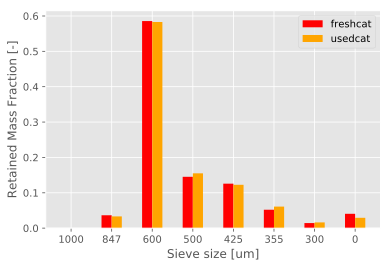

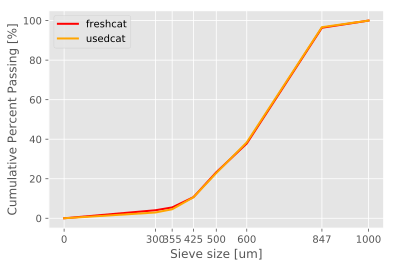

In [3]:
# Read measurements from CSV files
df_freshcat = pd.read_csv('../data/sieve_freshcat.csv')  # read fresh catalyst data
df_usedcat = pd.read_csv('../data/sieve_usedcat.csv')    # read used catalyst data

# Fresh catalyst analysis
freshcat_sieve = df_freshcat['sieve[um]'].values     # sieve pan hole size, microns
freshcat_retain = df_freshcat['freshcat[g]'].values  # retained mass on sieve, grams

freshcat_tot = sum(freshcat_retain)                  # total mass of fresh catalyst, grams
freshcat_cm = np.cumsum(freshcat_retain)             # cumulative sum of fresh catalyst, grams
freshcat_wtbelow = freshcat_tot - freshcat_cm        # weight below sieve, grams
freshcat_pass = (freshcat_wtbelow/freshcat_tot)*100  # cumulative percent passing, %

df_freshcat['cm. freshcat [g]'] = freshcat_cm    # add cumulative sum to dataframe
df_freshcat['wt. below [g]'] = freshcat_wtbelow  # add weight below to dataframe
df_freshcat['cm. passing [%]'] = freshcat_pass   # add cumulative passing to dataframe

display(df_freshcat)
print(f'freshcat total = {freshcat_tot:g} g')

# Used catalyst analysis
usedcat_sieve = df_usedcat['sieve[um]'].values    # sieve pan hole size, microns
usedcat_retain = df_usedcat['usedcat[g]'].values  # retained mass on sieve, grams

usedcat_tot = sum(usedcat_retain)                 # total mass of used catalyst, grams
usedcat_cm = np.cumsum(usedcat_retain)            # cumulative sum of used catalyst, grams
usedcat_wtbelow = usedcat_tot - usedcat_cm        # weight below sieve, grams
usedcat_pass = (usedcat_wtbelow/usedcat_tot)*100  # cumulative percent passing, %

df_usedcat['cm. usedcat [g]'] = usedcat_cm     # add cumulative sum to dataframe
df_usedcat['wt. below [g]'] = usedcat_wtbelow  # add weight below to dataframe
df_usedcat['cm. passing [%]'] = usedcat_pass   # add cumulative passing to dataframe

display(df_usedcat)
print(f'usedcat total = {usedcat_tot:g} g')

# Plot retained mass results
idx = range(len(freshcat_sieve))  # index for first group of items
wd = 0.25                         # width of each bar
idx2 = [x+wd for x in idx]        # index for second group of items
idx3 = [x+wd/2 for x in idx]      # index for item labels

plt.figure(3)
plt.bar(idx, freshcat_retain/freshcat_tot, align='center', color='red', width=wd, label='freshcat')
plt.bar(idx2, usedcat_retain/usedcat_tot, align='center', color='orange', width=wd, label='usedcat')
plt.xticks(idx3, freshcat_sieve)
plt.xlabel('Sieve size [um]')
plt.ylabel('Retained Mass Fraction [-]')
plt.legend()
plt.savefig('../results/sieve_catalyst1.pdf', bbox_inches='tight')
plt.show()

# Plot cumulative passing results
plt.figure(4)
plt.plot(freshcat_sieve, freshcat_pass, lw=2, color='red', label='freshcat')
plt.plot(usedcat_sieve, usedcat_pass, lw=2, color='orange', label='usedcat')
plt.xlabel('Sieve size [um]')
plt.ylabel('Cumulative Percent Passing [%]')
plt.xticks(freshcat_sieve)
plt.legend()
plt.savefig('../results/sieve_catalyst2.pdf', bbox_inches='tight')
plt.show()